In [3]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.cross_validation import KFold
from sklearn import svm
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedShuffleSplit
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import f1_score
# import xgboost as xgb
%matplotlib inline
from sklearn import svm

In [4]:
x_train_data = np.loadtxt('kaggle/train_predictors.txt', delimiter=',')
y_train_data = np.loadtxt('kaggle/train_labels.txt', delimiter=',')
x_test = np.loadtxt('kaggle/test_predictors.txt', delimiter=',')

In [19]:
n = len(y_train_data)
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_sample(x_train_data, y_train_data)

(array([ 67474.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  67474.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

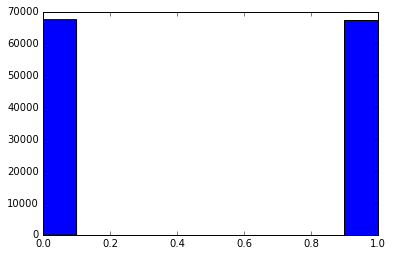

In [23]:
plt.hist(y_res)

In [24]:
n_train = int(np.round(n*0.2))

permute = np.random.permutation(n)
x_train_permuted = X_res[permute, :]
y_train_permuted = y_res[permute]

x_train_sample = x_train_permuted[0:n_train, :]
x_train_validate = x_train_permuted[n_train:, :]
y_train_sample = y_train_permuted[0:n_train]
y_train_validate = y_train_permuted[n_train:]

(array([ 13505.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,     76.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

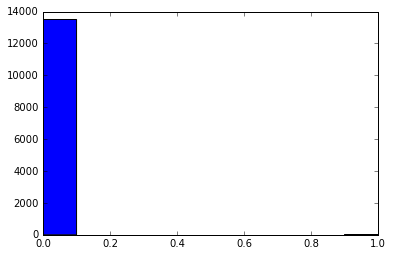

In [53]:
np.unique(y_train_sample)

In [47]:
clf_svm = svm.SVC() 

In [48]:
clf_svm.fit(x_train_sample, y_train_sample, ) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
clf_svm.score(x_train_validate, y_train_validate)

0.99412771754137286

In [51]:
f1_score(y_train_validate, clf_svm.predict(x_train_validate), average='macro')

0.5905982381988345

(array([  5.42860000e+04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.70000000e+01]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

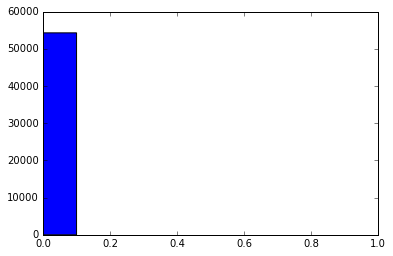

In [52]:
plt.hist(clf_svm.predict(x_train_validate))

In [45]:
clf_tree = AdaBoostClassifier(clf, n_estimators=50)

In [46]:
clf_tree.fit(x_train_sample, y_train_sample) 

TypeError: AdaBoostClassifier with algorithm='SAMME.R' requires that the weak learner supports the calculation of class probabilities with a predict_proba method.
Please change the base estimator or set algorithm='SAMME' instead.

In [ ]:
plt.hist(y_train_validate)

In [36]:
clf_tree.score(x_train_validate, y_train_validate)

0.99348342322773042

In [38]:
f1_score(y_train_validate, clf_tree.predict(x_train_validate), average='macro') 

//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.49836553023307351

In [43]:
y_predict = clf_tree.predict(x_test)

KeyboardInterrupt: 

In [40]:
def saveoutput(y_predict):
    output = np.array([range(1, len(y_predict)+1), y_predict])
    np.savetxt('test2.txt', np.transpose(output), fmt="%1.0f", newline='\n', delimiter=',', header='index,label')   # X is an array

In [41]:
saveoutput(y_predict)

(array([     0.,      0.,      0.,      0.,      0.,  33149.,      0.,
             0.,      0.,      0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

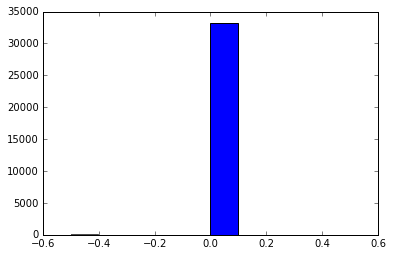

In [42]:
plt.hist(y_predict)